In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

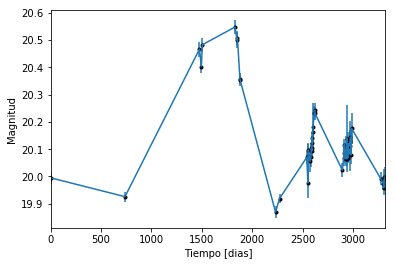

In [2]:
data = np.genfromtxt('LC_G_49159.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

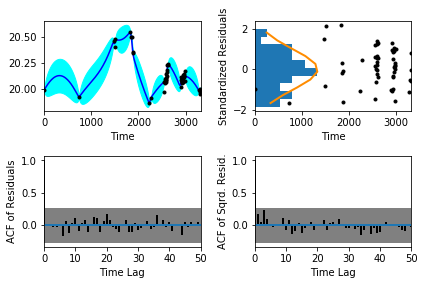

In [5]:
sample.assess_fit()

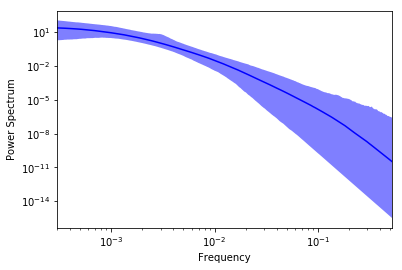

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

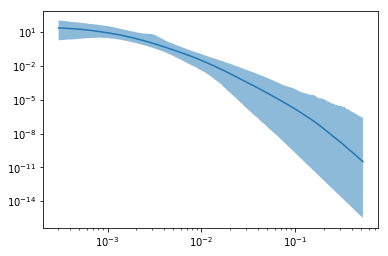

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

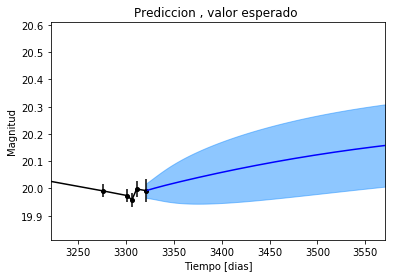

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

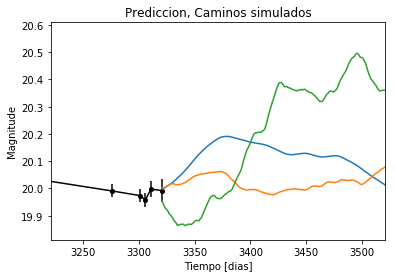

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


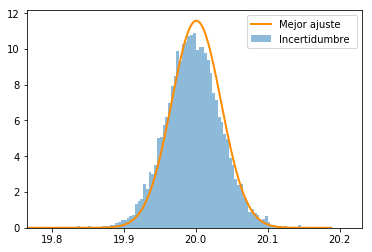

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

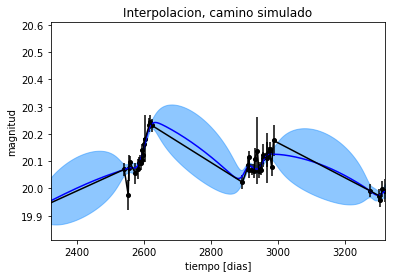

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

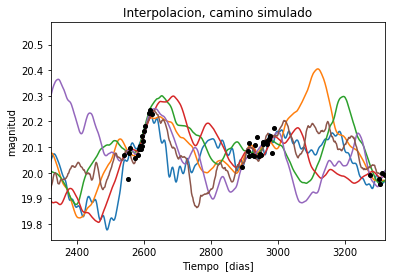

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 383.867417455
Median: 0.0128697323955
Standard deviation: 0.239572947321
68% credibility interval: [ 0.         0.3543949]
95% credibility interval: [ 0.          0.85340031]
99% credibility interval: [ 0.          1.01043372]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 383.867417455
Median: 0.0128697323955
Standard deviation: 0.239572947321
68% credibility interval: [ 0.         0.3543949]
95% credibility interval: [ 0.          0.85340031]
99% credibility interval: [ 0.          1.01043372]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1811.92367666
Median: 0.0
Standard deviation: 0.000575657708125
68% credib

Plotting parameter summary


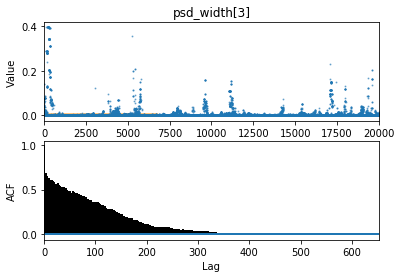

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:

sample.posterior_summaries('logpost')


Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 993.23481861
Median: 104.698668414
Standard deviation: 1.67321895083
68% credibility interval: [ 102.83189832  105.89484123]
95% credibility interval: [ 100.27482277  106.54789771]
99% credibility interval: [  97.83420748  106.93985281]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 501.846021034
Median: 0.586907813632
Standard deviation: 1.99794164052
68% credibility interval: [ 0.07314333  3.44192402]
95% credibility interval: [ 0.02118259  6.78313774]
99% credibility interval: [ 0.01290821  8.97844686]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 477.027621314
Median: 0.620457125895
Standard deviation: 7.96494352691
68% credibility interval: [ 0.01998362  7.70692557]
95% credibility interval: [  2.48764405e-0

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10100.6698645
Median: 1.76643046094e-29
Standard deviation: 9.72040787433e+86
68% credibility interval: [  6.36544327e-58   2.76621681e-03]
95% credibility interval: [  3.24860853e-105   1.11261040e+066]
99% credibility interval: [  4.76308857e-157   1.04998140e+079]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1709.95470548
Median: 20.1169858748
Standard deviation: 0.112037552337
68% credibility interval: [ 20.01632225  20.20460203]
95% credibility interval: [ 19.88231475  20.33337651]
99% credibility interval: [ 19.77028611  20.44304352]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 383.867417455
Median: 0.0128697323955
Standard deviation: 0.239572947321
68% credibility interval: [ 0.         0.3543949]
95% credibility interval: [ 0.          0.85340031]
99% credibility interval: [ 0.          1.01043372]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 383.867417455
Median: 0.0128697323955
Standard deviation: 0.239572947321
68% credibility interval: [ 0.         0.3543949]
95% credibility interval: [ 0.          0.85340031]
99% credibility interval: [ 0.          1.01043372]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1811.92367666
Median: 0.0
Standard deviation: 0.000575657708125
68% credib

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 993.23481861
Median: 104.698668414
Standard deviation: 1.67321895083
68% credibility interval: [ 102.83189832  105.89484123]
95% credibility interval: [ 100.27482277  106.54789771]
99% credibility interval: [  97.83420748  106.93985281]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 502.944754437
Median: 0.0171235256113
Standard deviation: 0.201299777186
68% credibility interval: [ 0.00174256  0.22290307]
95% credibility interval: [  4.10223697e-04   7.82288921e-01]
99% credibility interval: [  3.19231044e-04   9.84064102e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 786.616495051
Median: 0.00447735715759
Standard deviation: 0.07687109964
68% credibility interval: [ 0.00056037  0.04152125]
95% credibility interval: [ 0.00032899  0.26223355]
99% credibility interval: [  3.08429090e-04   5.16709698e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 387.905024139
Median: 0.00965598474171
Standard d

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2236.87732827
Median: 0.0581873486382
Standard deviation: 0.0619635846548
68% credibility interval: [ 0.03629012  0.10163629]
95% credibility interval: [ 0.0238449   0.20228619]
99% credibility interval: [ 0.018932    0.38906584]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1948.22871313
Median: 0.902741262808
Standard deviation: 0.1509580178
68% credibility interval: [ 0.77075028  1.06261634]
95% credibility interval: [ 0.66886003  1.25165565]
99% credibility interval: [ 0.60587724  1.40716005]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1447.88500412
Median: 0.000449964910497
Standard deviation: 0.0207987408847
68% credibility interval: [  4.15813814e-06   7.47543515e-03]
95% credibility interval: [  2.13942586e-69   3.21317756e-02]
99% credibility interval: [  4.01968921e-84   6.75515910e-02]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 502.944754437
Median: (-0.107590284528-0.0778487623189j)
Standard deviation: 1.96611297172
68% credibility interval: [-1.40054129+0.j -0.01094881+0.j]
95% credibility interval: [ -4.91526625e+00+0.j          -2.57751150e-03-0.59554278j]
99% credibility interval: [ -6.18305711e+00+0.j          -2.00578781e-03-0.96232265j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 786.616495051
Median: (-0.0281320647076+0.531796532153j)
Standard deviation: 1.5808719368
68% credibility interval: [-0.26088568+0.j        -0.00352088+0.2052478j]
95% credibility interval: [-1.64766199+1.74586677j -0.00206709+0.j        ]
99% credibility interval: [ -3.24658279e+00+4.02025883j  -1.93791713e-03+0.j        ]
Posterior summary for parameter

Plotting 2d PDF w KDE


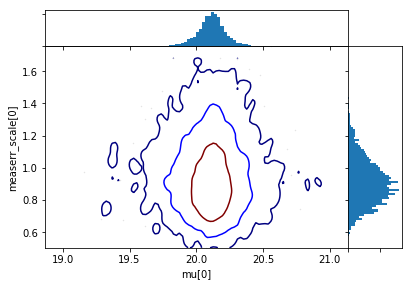

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


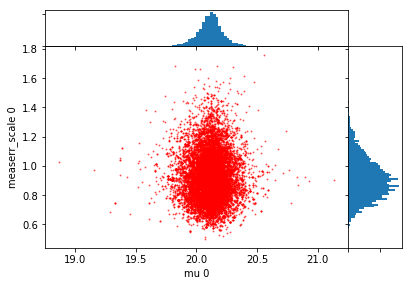

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


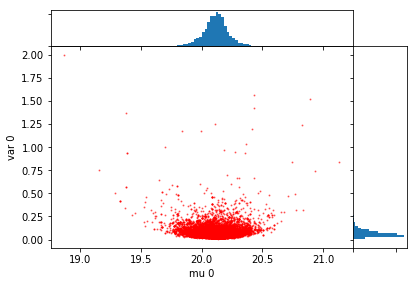

In [41]:
sample.plot_2dpdf('mu', 'var', doShow=True)

In [ ]:
sample.plot_2dkde('mu', 'var', doShow=True)

Plotting 2d PDF w KDE
